## O problemu

## Priprema i preobrada podataka

### Importovanje biblioteka

In [909]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

### Ucitavanje podataka

In [910]:
import pandas as pd

df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


### Informacije o podacima

In [911]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [912]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Detekcija duplikata

In [913]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [914]:
dupl = df.duplicated()
print('Broj duplikata: %d' % dupl.sum())


Broj duplikata: 0


### Uklanjanje NaN vrednosti

In [915]:
# procenat nedostajućih vrednosti u svakoj koloni
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

<AxesSubplot: >

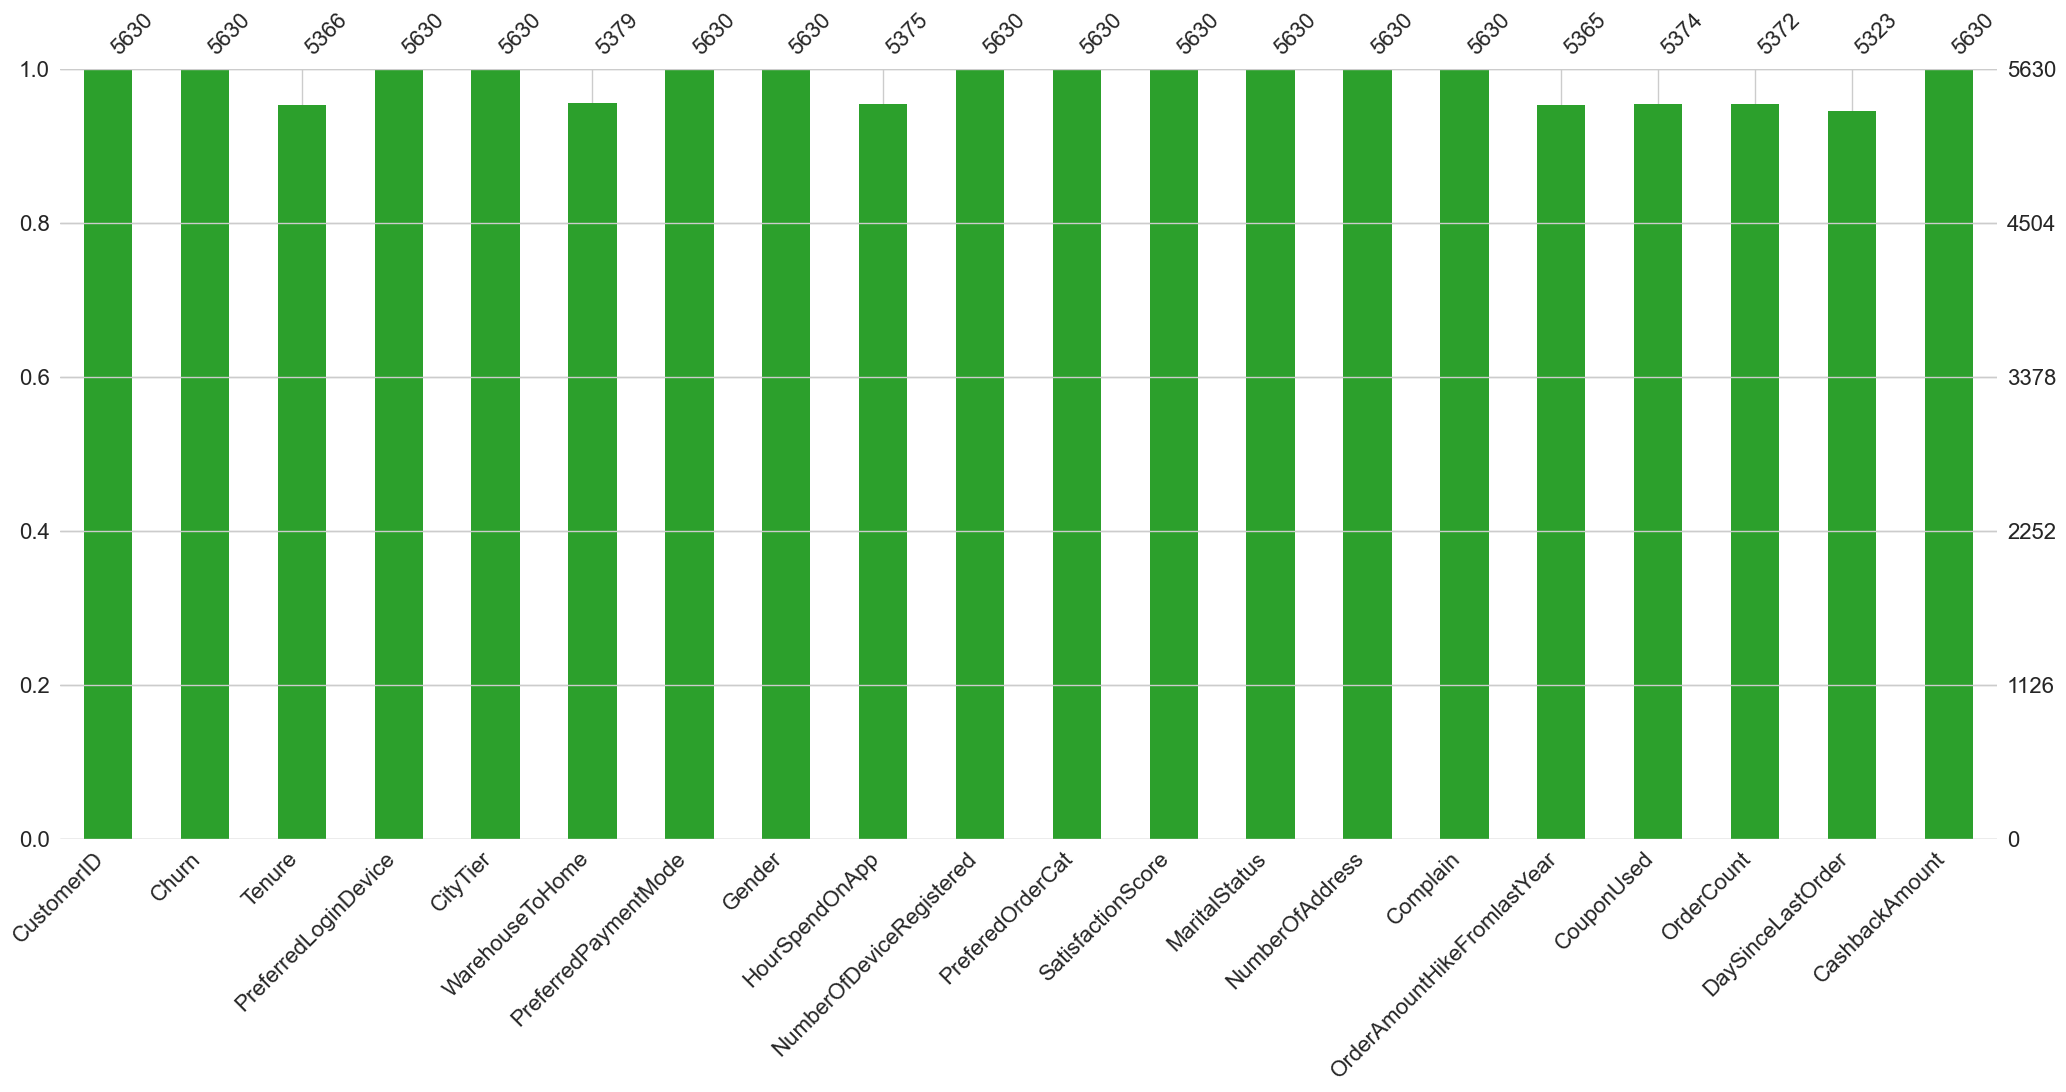

In [916]:
msno.bar(df , color="tab:green")

Sve nedostajuće vrednosti su manje od 6%, stoga ih možemo popuniti.

In [917]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')
df['Tenure'].isnull().sum()

0

In [918]:
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))
df['WarehouseToHome'].isnull().sum()

0

In [919]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))
df['HourSpendOnApp'].isnull().sum()

0

In [920]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

In [921]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])
df['CouponUsed'].isnull().sum()

0

In [922]:
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
df['OrderCount'].isnull().sum()

0

In [923]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')
df['DaySinceLastOrder'].isnull().sum()

0

<AxesSubplot: >

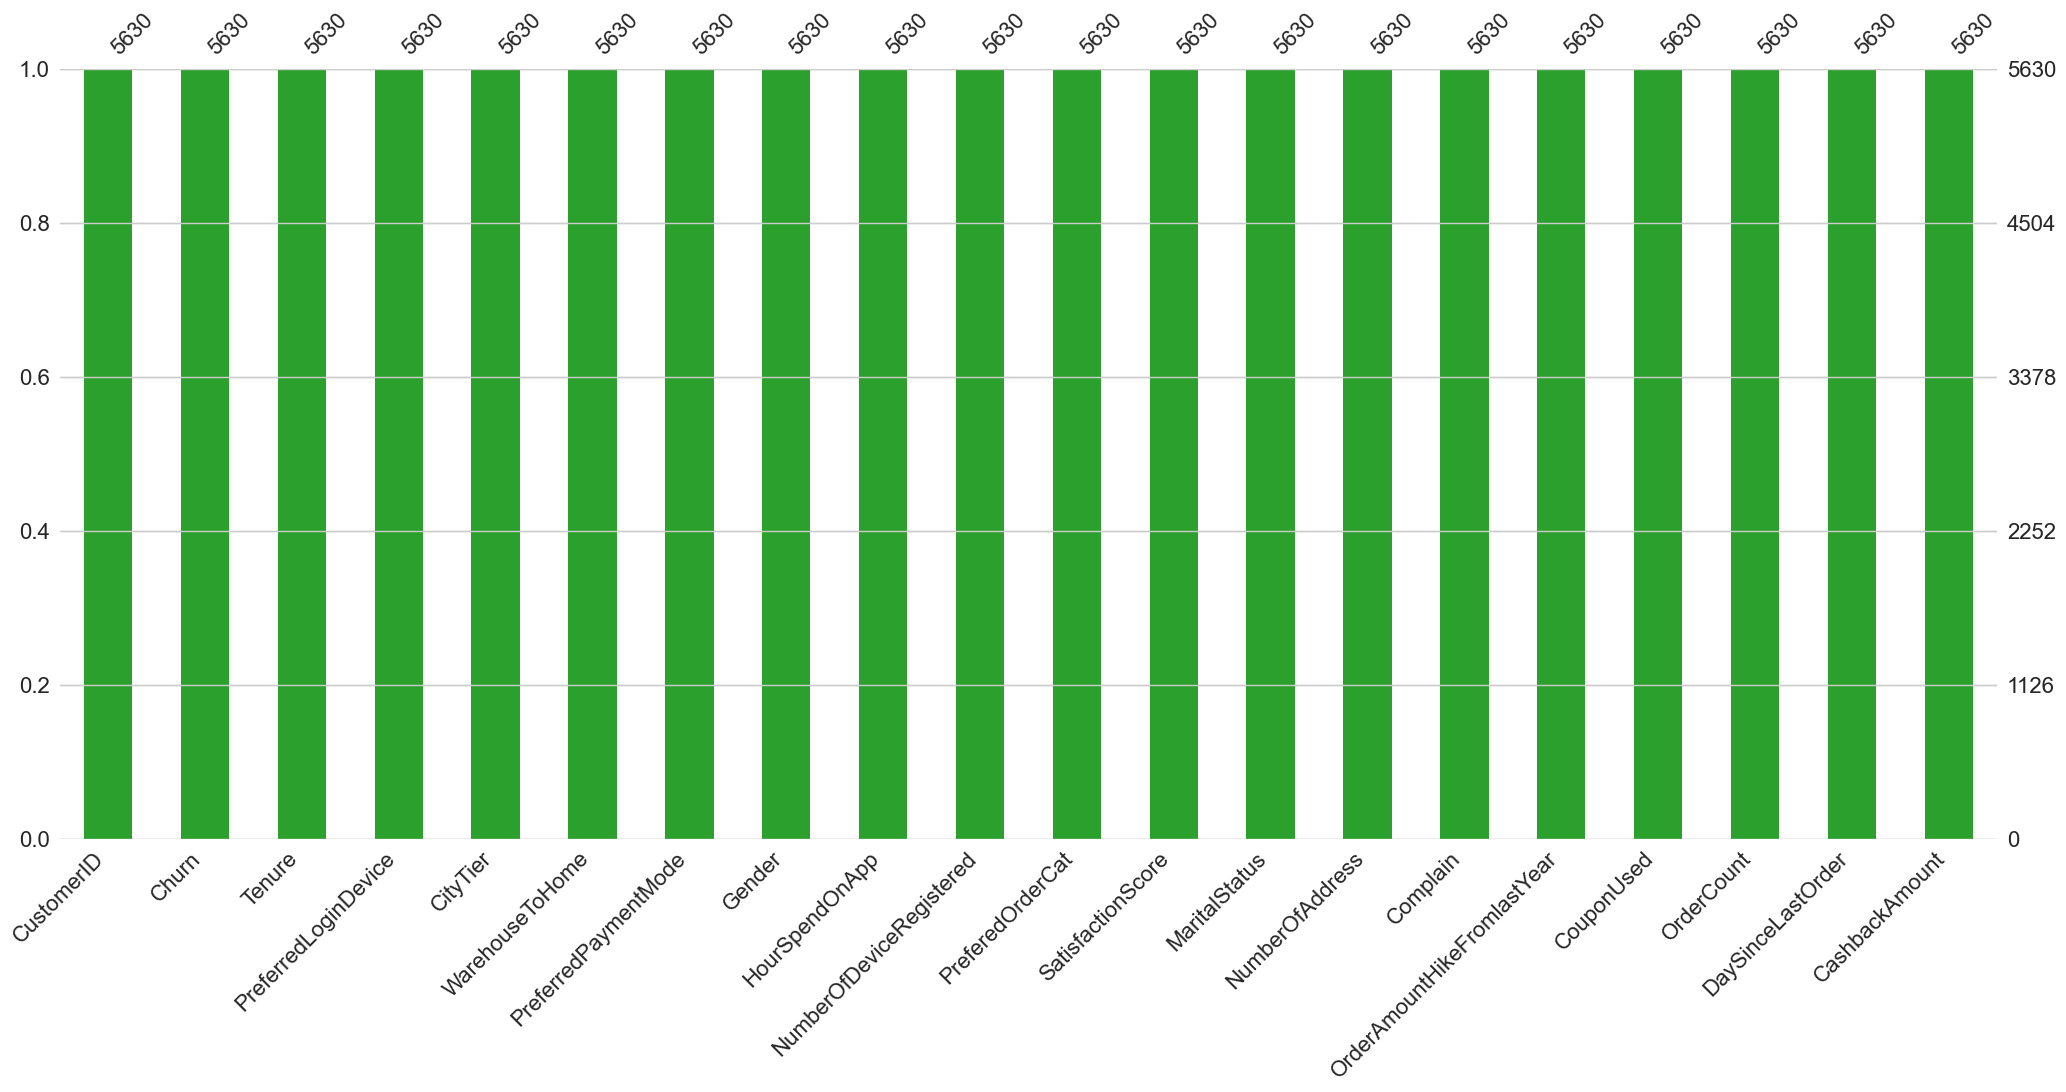

In [924]:
msno.bar(df , color="tab:green")

### Izbacivanje CustomerID

In [925]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df.shape

(5630, 19)

### Kodiranje kategoričkih fičera

In [926]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [927]:
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,2,1,12.0,0,1,4.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [928]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,4,0,2,2
1,2,6,1,3,2
2,2,4,1,3,2
3,2,4,1,2,2


### Outliers

In [929]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

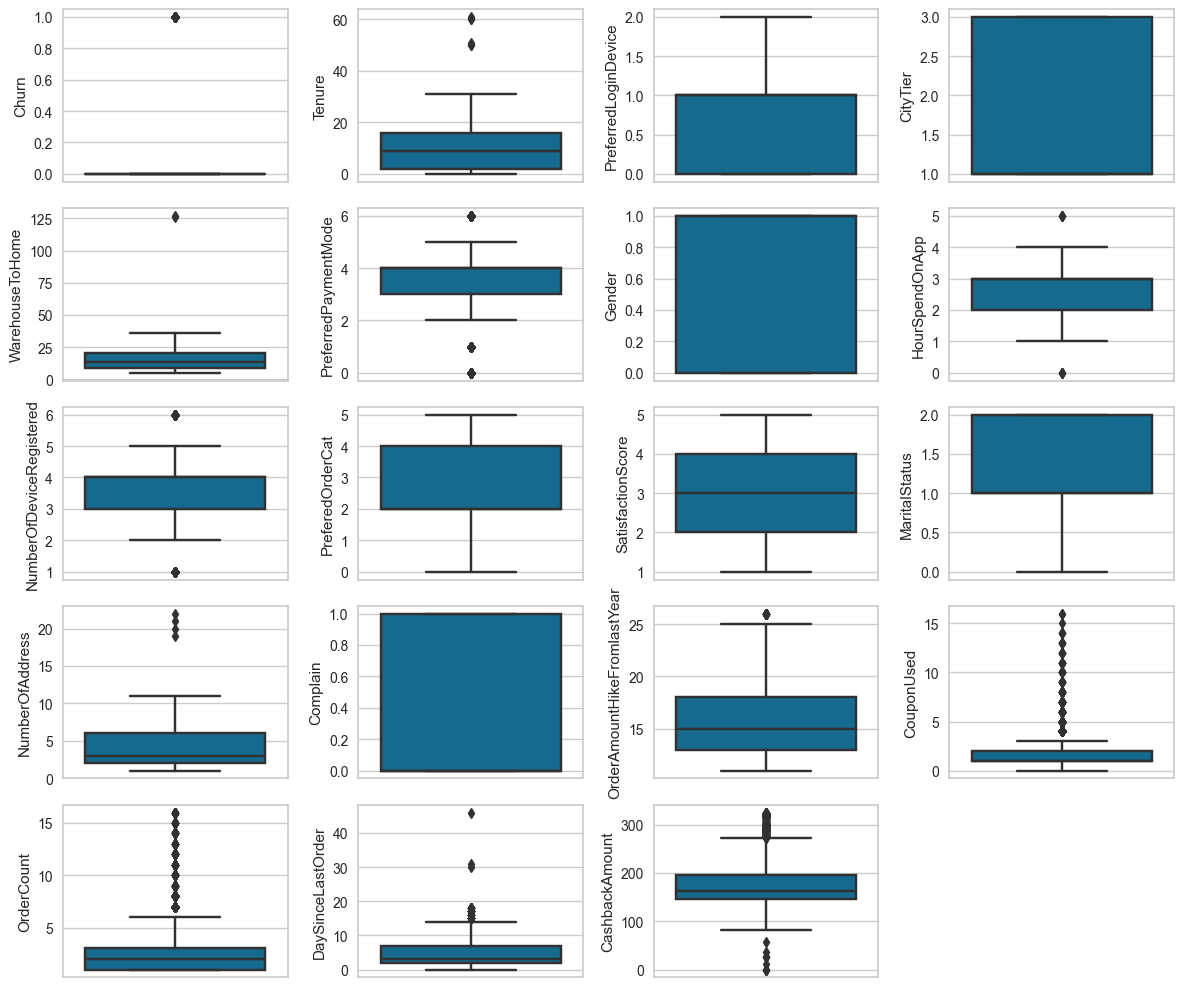

In [930]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

IRQ metod

In [931]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [932]:
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


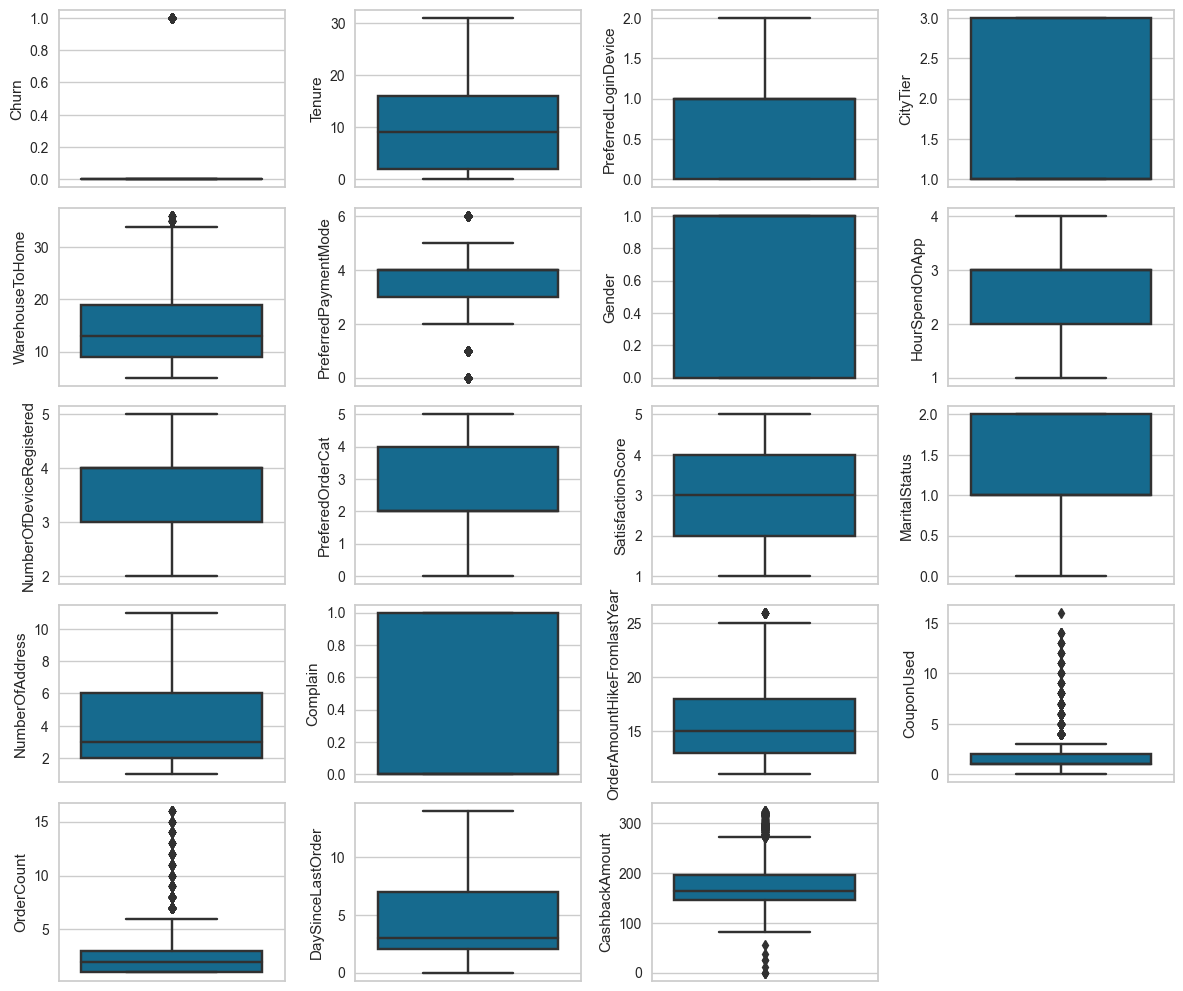

In [933]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [934]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.336064,0.026938,0.069943,0.054755,-0.037556,0.037859,0.000858,0.079562,0.115468,0.108673,0.131527,0.034097,0.251844,-0.001993,-0.017746,-0.036282,-0.164223,-0.164679
Tenure,-0.336064,1.000000,-0.081114,-0.065989,-0.011842,0.041436,-0.054629,-0.010546,-0.019661,-0.169959,-0.013335,-0.111002,0.240897,-0.023795,0.017088,0.127288,0.181098,0.164402,0.453959
PreferredLoginDevice,0.026938,-0.081114,1.000000,-0.062898,-0.052090,-0.072570,0.009914,-0.070273,-0.082360,0.163898,0.052813,0.003101,-0.052368,0.006555,-0.013285,-0.109730,-0.122107,-0.146745,-0.231799
CityTier,0.069943,-0.065989,-0.062898,1.000000,0.014650,0.238300,-0.022647,-0.011237,0.007153,-0.190264,-0.009742,0.002428,-0.033488,0.006534,-0.022318,0.017083,0.035561,0.023295,0.044816
WarehouseToHome,0.054755,-0.011842,-0.052090,0.014650,1.000000,0.037998,-0.015920,0.078371,0.029068,-0.104252,0.013784,-0.028253,0.001189,0.022030,0.028954,0.013183,0.016248,0.044898,0.036339
PreferredPaymentMode,-0.037556,0.041436,-0.072570,0.238300,0.037998,1.000000,0.001326,0.053813,0.061365,-0.091392,-0.019139,-0.028450,0.040350,0.023610,0.021596,0.049971,0.024652,0.054286,0.157976
Gender,0.037859,-0.054629,0.009914,-0.022647,-0.015920,0.001326,1.000000,-0.016649,-0.020809,0.065960,-0.037343,-0.020177,-0.030443,-0.030611,-0.007492,-0.026415,-0.030988,-0.027482,-0.024159
HourSpendOnApp,0.000858,-0.010546,-0.070273,-0.011237,0.078371,0.053813,-0.016649,1.000000,0.275975,0.085341,0.027359,-0.039038,0.135650,0.001512,0.098406,0.181004,0.104781,0.083278,0.118939
NumberOfDeviceRegistered,0.079562,-0.019661,-0.082360,0.007153,0.029068,0.061365,-0.020809,0.275975,1.000000,0.037550,-0.001050,0.037670,0.070939,-0.001772,0.061072,0.135914,0.092372,0.025927,0.119876
PreferedOrderCat,0.115468,-0.169959,0.163898,-0.190264,-0.104252,-0.091392,0.065960,0.085341,0.037550,1.000000,-0.000417,0.042252,-0.077631,0.001234,0.019449,-0.113026,-0.145133,-0.220044,-0.274091


<AxesSubplot: >

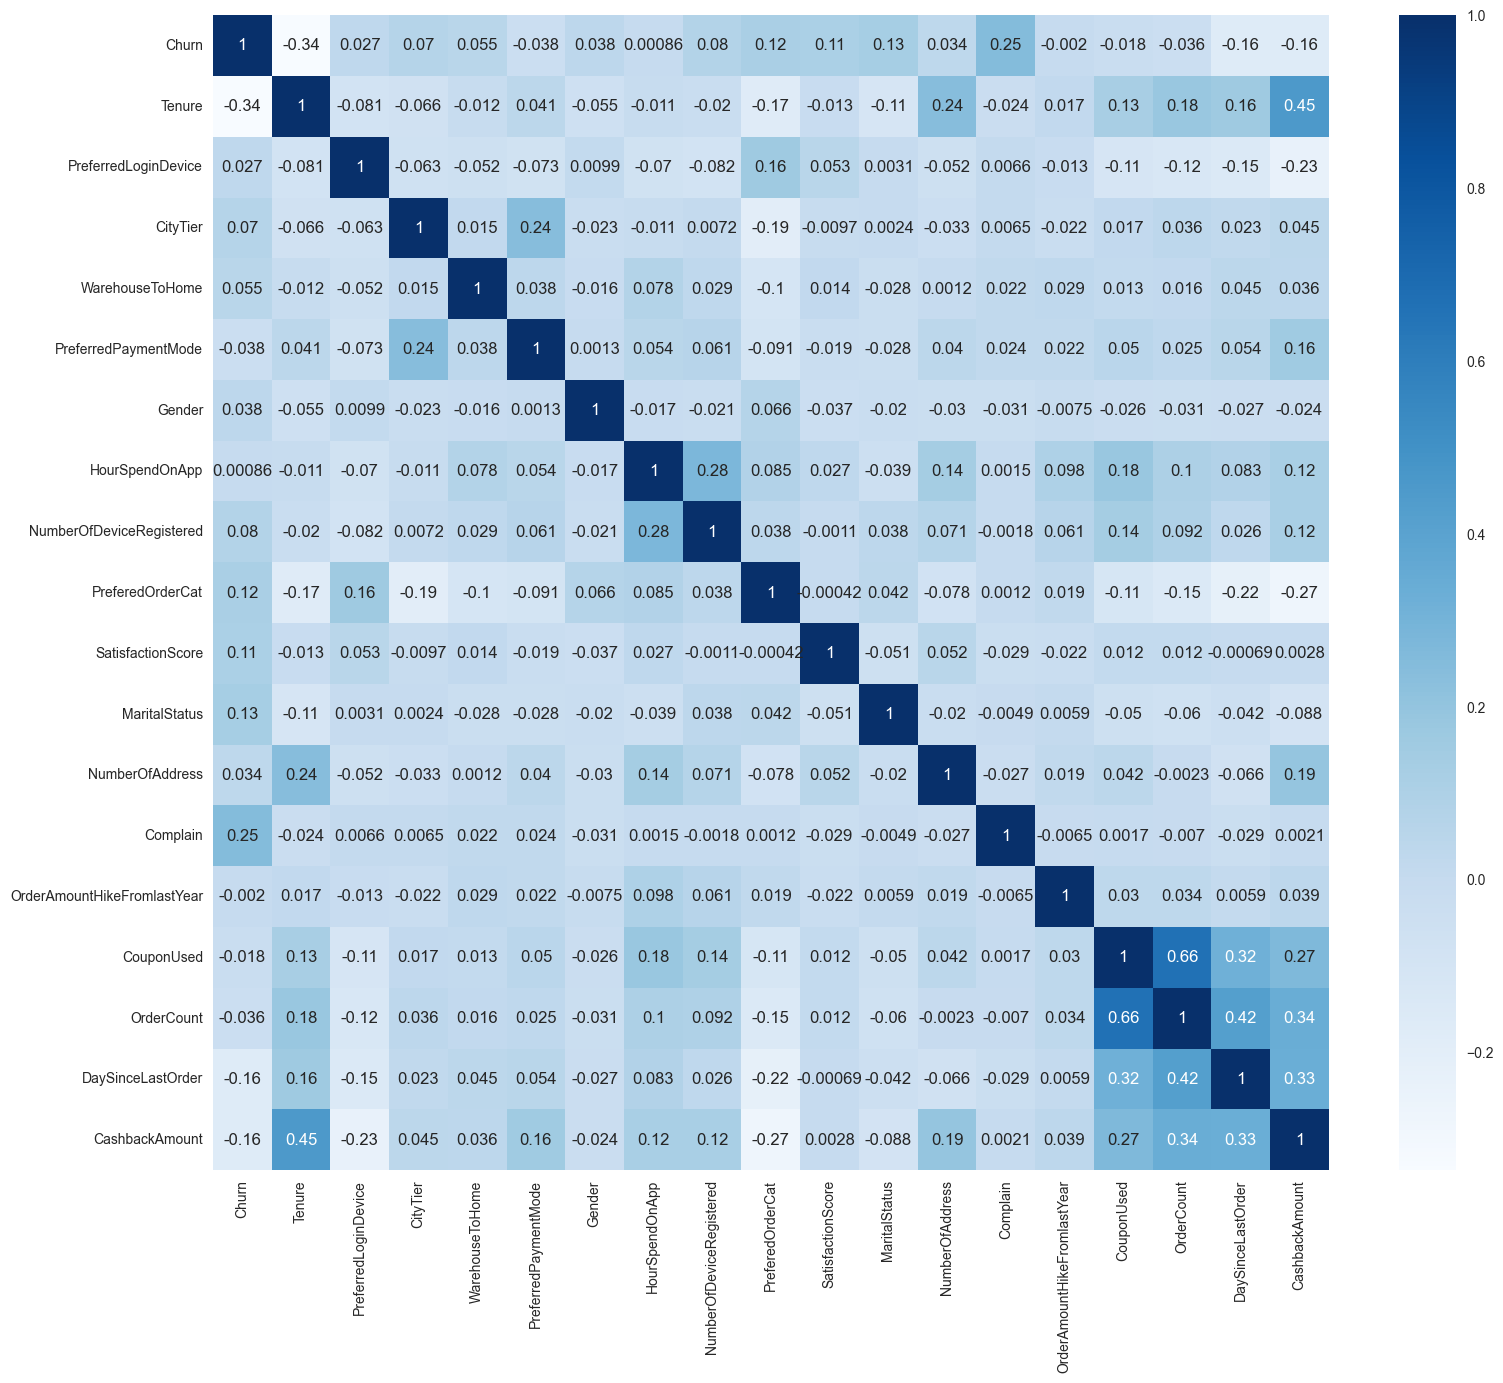

In [935]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

## Klasterizacija

### Skaliranje

In [936]:
# from sklearn.preprocessing import MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df.describe()

### Procena optimalnog broja klastera

In [937]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def elbowDist(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12))
    elbow.fit(df)
    elbow.show()

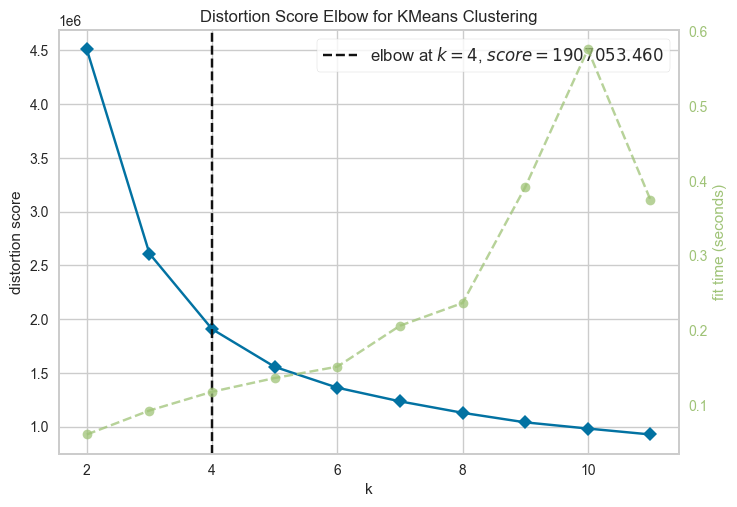

In [938]:
elbowDist(df)

In [939]:
def elbowCH(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='calinski_harabasz')
    elbow.fit(df)
    elbow.show()

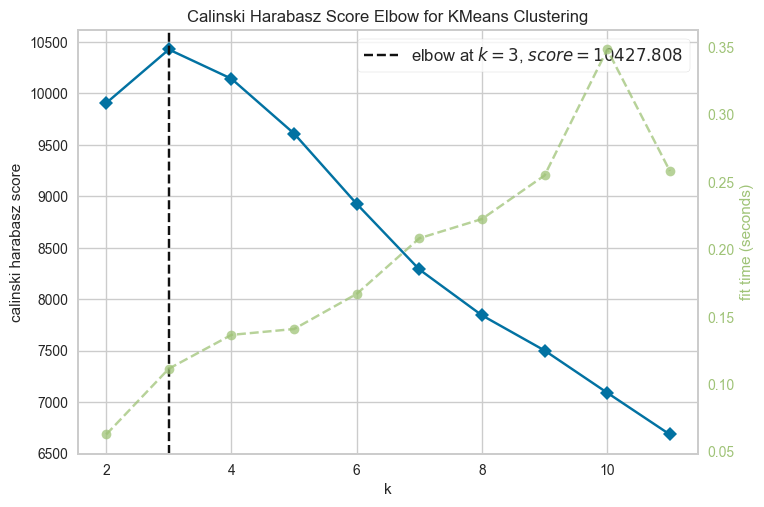

In [940]:
elbowCH(df)

In [941]:
def elbowSil(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='silhouette')
    elbow.fit(df)
    elbow.show()

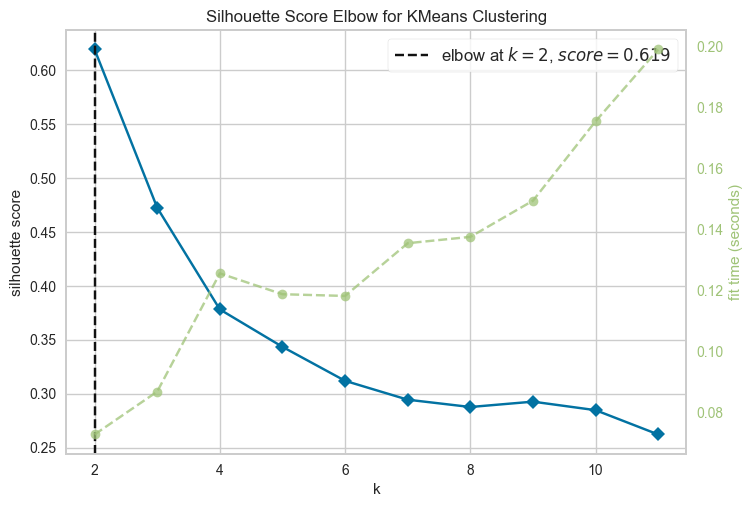

In [942]:
elbowSil(df)

### PCA predobrada

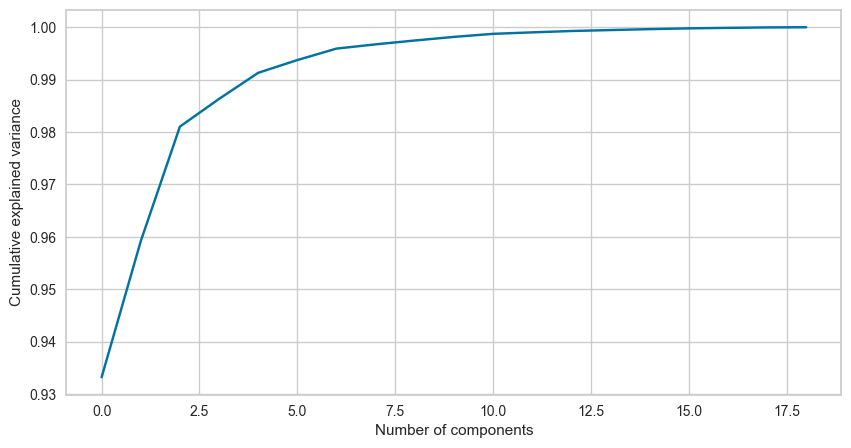

In [943]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### K-Means Clustering

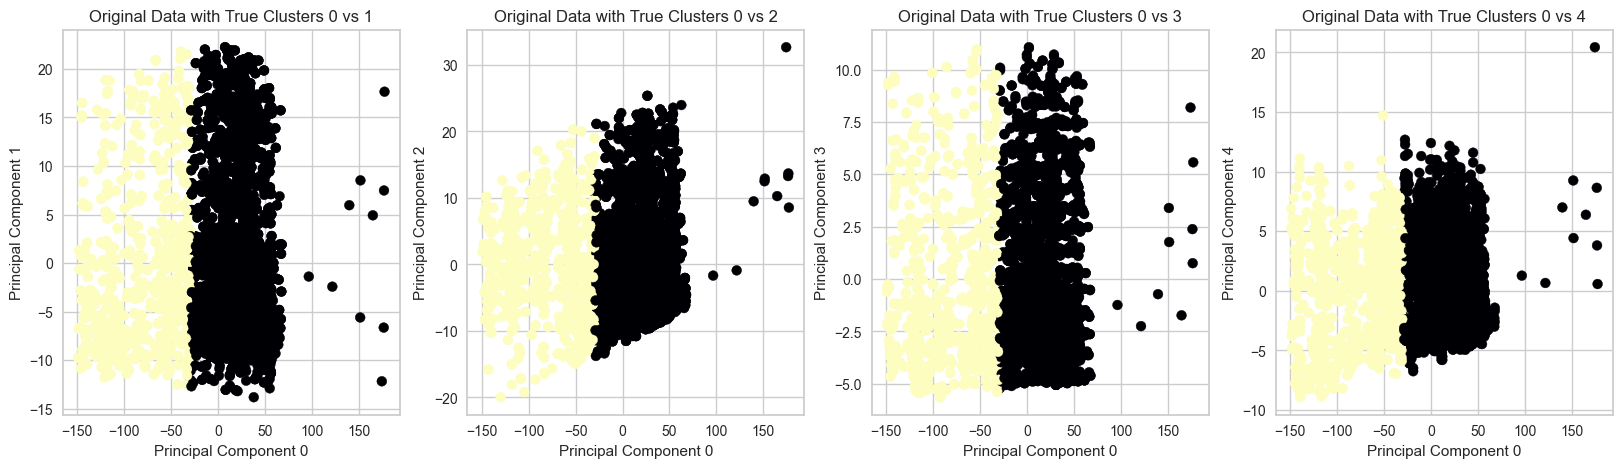

In [958]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot the original data with cluster assignments
plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='magma', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

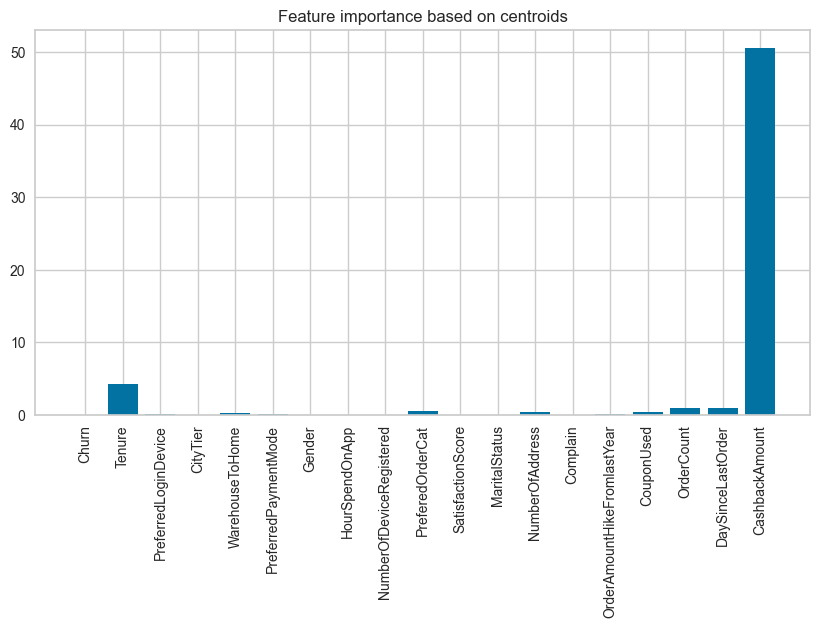

In [945]:
centroids = kmeans.cluster_centers_

# Feature importance based on centroid differences
feature_importance = centroids.std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

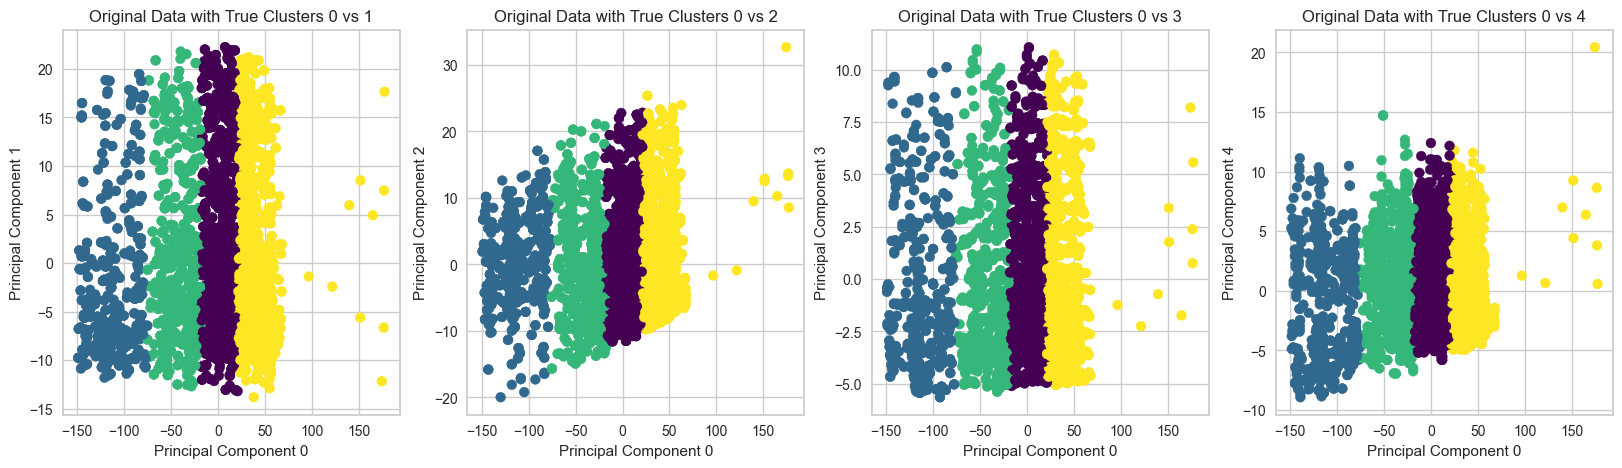

In [946]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot the original data with cluster assignments
plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

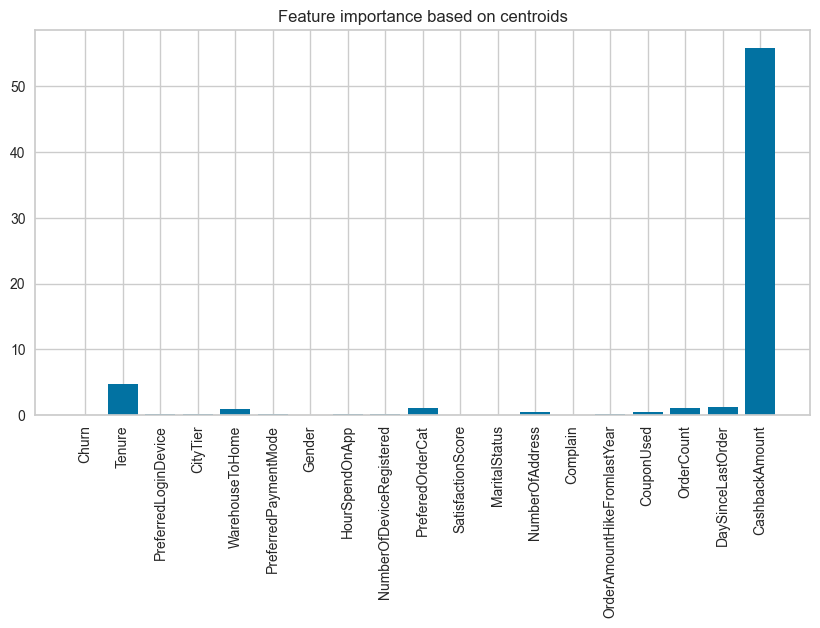

In [947]:
centroids = kmeans.cluster_centers_

# Feature importance based on centroid differences
feature_importance = centroids.std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [948]:
# kmeans = KMeans(n_clusters=5, random_state=42)
# kmeans_labels = kmeans.fit_predict(data)

# # Apply PCA to reduce dimensionality to 3 components
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(data)

# # Visualize the results in a 3D scatterplot
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Scatterplot for original data points
# ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels,
#            marker='o', cmap='viridis', label='Original Data')

# # Scatterplot for KMeans clusters
# ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels,
#            marker='x', cmap='tab10', label='KMeans Clusters')

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.set_title('KMeans Clustering with PCA Visualization')
# ax.legend()

# ax.view_init(elev=50, azim=50)

# plt.show()

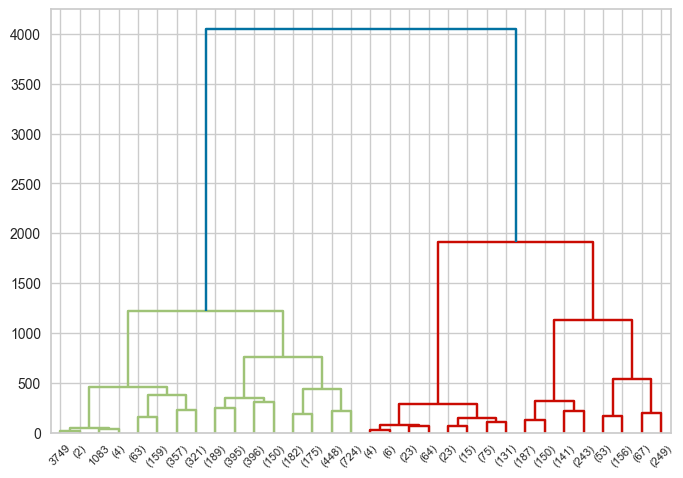

In [949]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(
    X, method='ward'), truncate_mode='level', p=4)

### Agglomerative Clustering

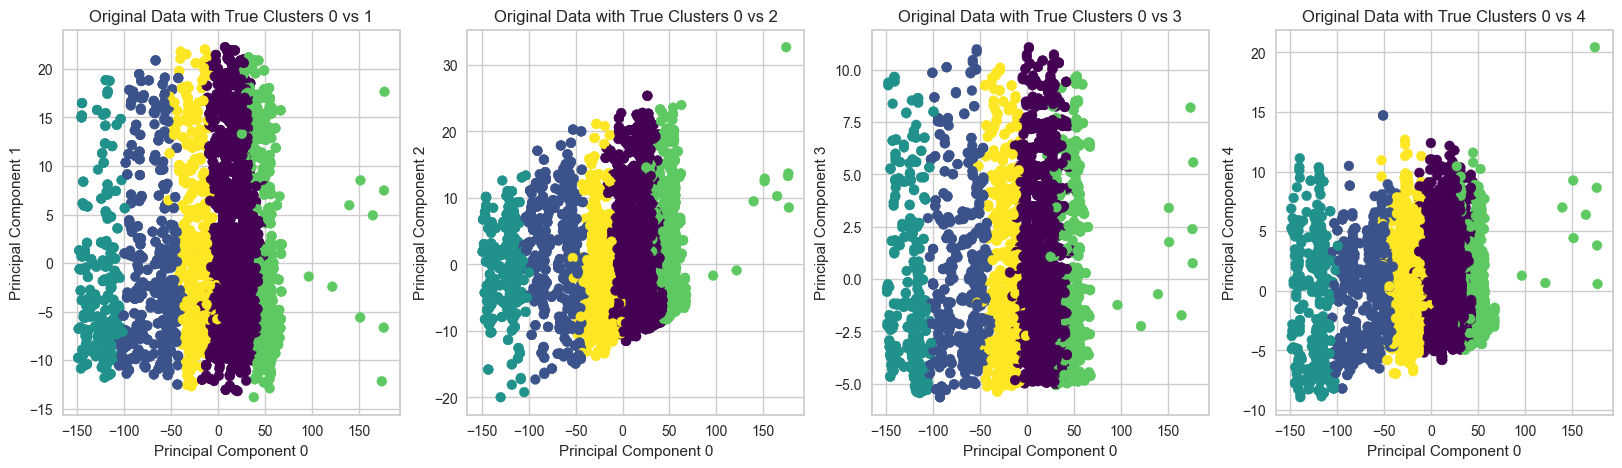

In [950]:
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=5)
labels = agg_clustering.fit_predict(df)


plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

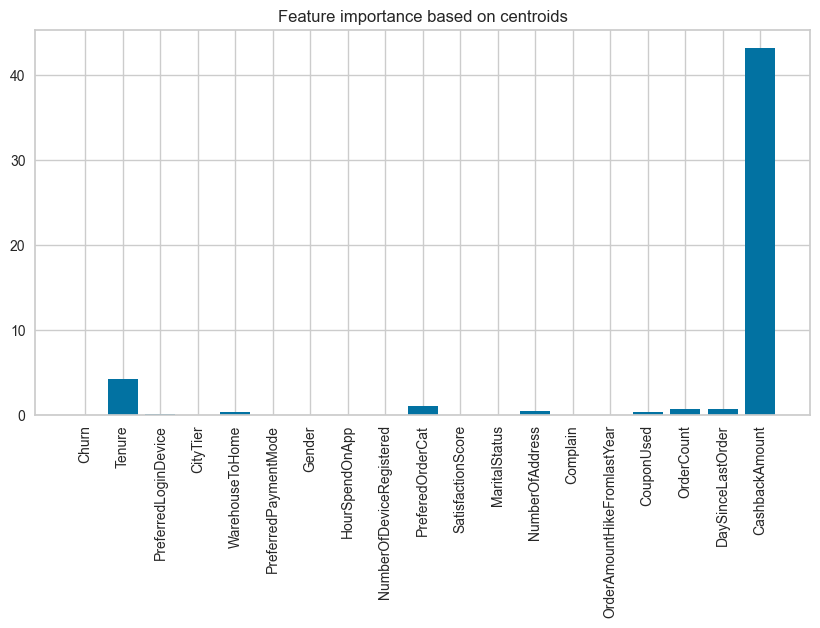

In [951]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]
cluster_3 = df[agg_clustering.labels_ == 2]
cluster_4 = df[agg_clustering.labels_ == 3]

cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)
cluster_3_center = cluster_3.mean(axis=0)
cluster_4_center = cluster_4.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

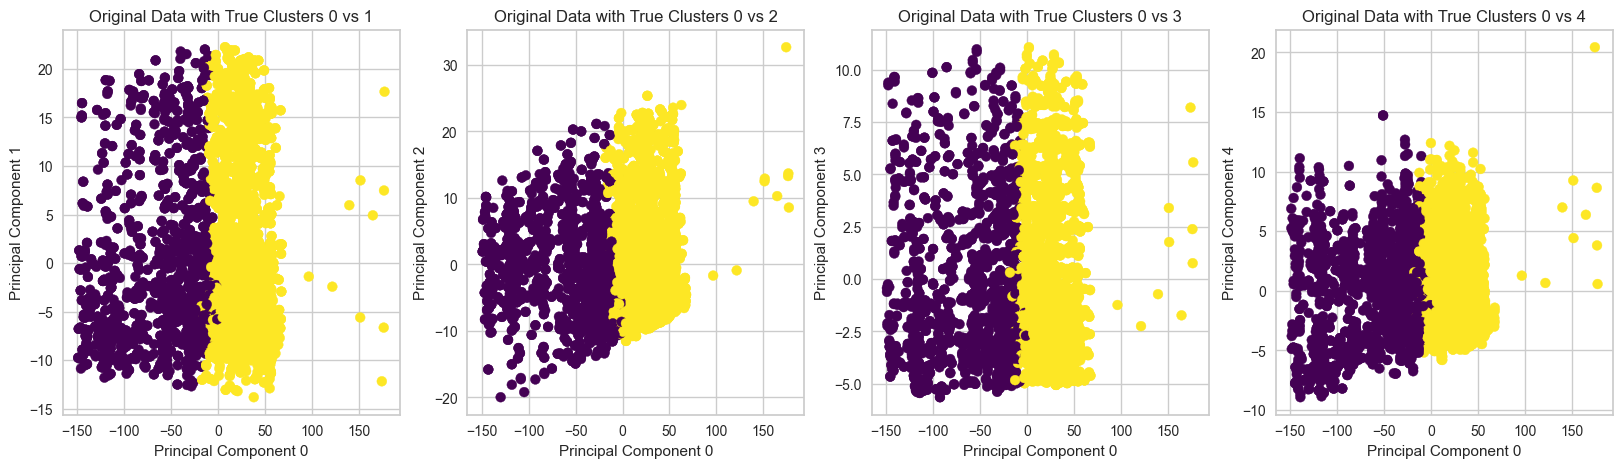

In [952]:
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(df)


plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

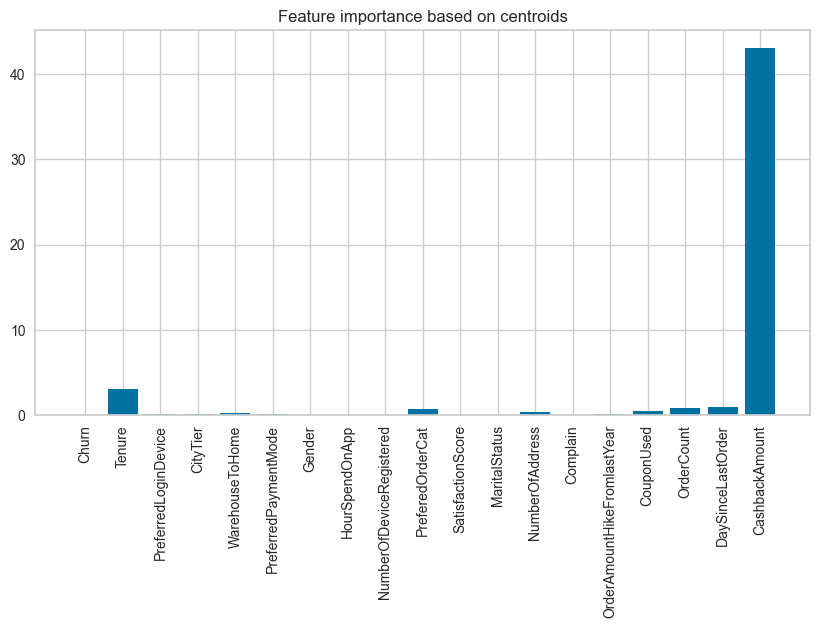

In [953]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]
cluster_3 = df[agg_clustering.labels_ == 2]
cluster_4 = df[agg_clustering.labels_ == 3]

cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)
cluster_3_center = cluster_3.mean(axis=0)
cluster_4_center = cluster_4.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

### DBSCAN

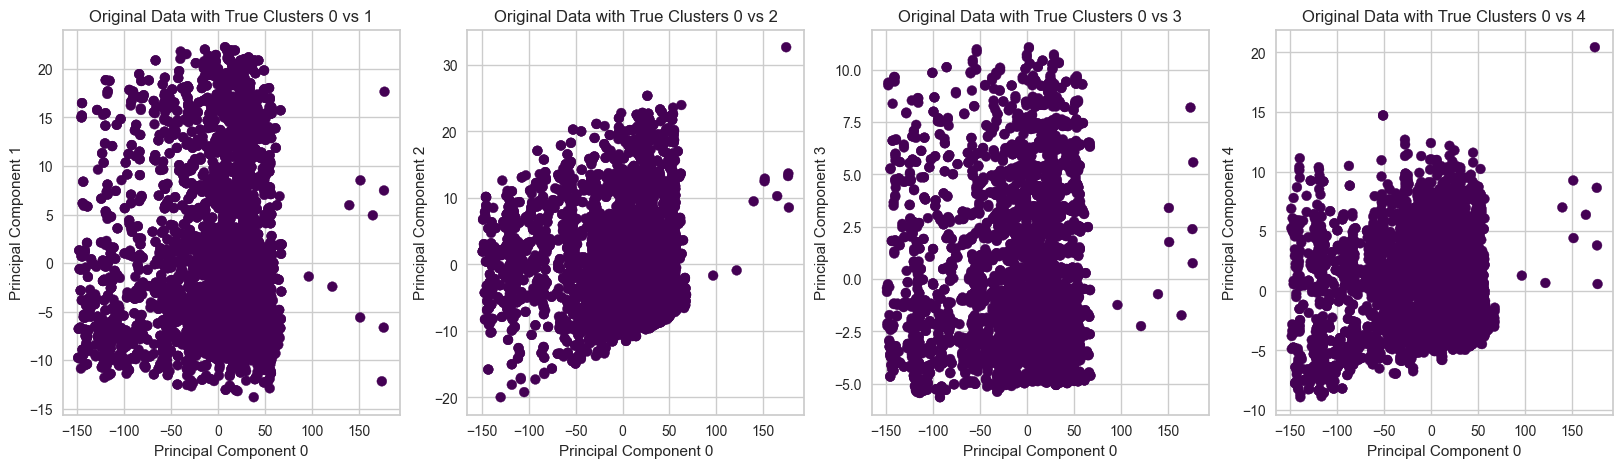

In [956]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(df)

#print((y_dbscan != -1).sum())

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')